In [1]:
import becquerel as bq
from becquerel import Spectrum
from becquerel.tools import Isotope, IsotopeQuantity, NeutronIrradiation
import datetime
import numpy as np
import scipy.integrate as integrate
import math as m
import importlib
import pandas as pd
import sys
import os
import csv
import matplotlib.pyplot as plt
import time
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([609, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\UCB087_Wild_King_Salmon_2.Spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\UCB096_Backgorund_2_13_17.Spe'
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\UCB087_Wild_King_Salmon_2.Spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\UCB096_Backgorund_2_13_17.Spe


In [3]:
startTime = time.time()
roi = ROI.ROI(spec, bgspec, source_energies, 1)
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()
executionTime = (time.time() - startTime)
print(roi_counts)
print(roi_unc)
print('Execution time:' + str(executionTime), 's')

c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:726: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


Peak counts at 609.0 keV: 326.0
Background counts: 609.0 keV: 295.0
Peak counts at 1461.0 keV: 26094.999999999993
Background counts: 1461.0 keV: 60.5
Peak counts at 2615.0 keV: -23.999999999999996
Background counts: 2615.0 keV: 2.5
[31.0, 26034.499999999993, -26.499999999999996]
[48.948953002081666, 166.9034151837523, 30.079062485390065]
Execution time:3.1003782749176025 s


In [4]:
def f_near(a,a0):
    idx = np.abs(a-a0).argmin()
    return idx

def plot_peak_region(roi, spectrum, sourcen_energies, key):
    roi.find_peak_energies()
    target_peaks = roi.target_peaks
    spec = spectrum
    counts = spec.counts_vals
    energies = spec.bin_centers_kev
    idx = f_near(energies,key) 
    roi_low = idx - 50
    roi_high = idx + 50

    plot_counts = counts[roi_low:roi_high]
    plot_energies = energies[roi_low:roi_high]
        
    roi_low_bins,roi_peak_bins,roi_high_bins = roi.get_roi_windows(roi.roi_pars["%s" %key])
    rlow = roi_low_bins[0][0]
    rhi = roi_high_bins[0][-1]
    plot_counts = counts[rlow:rhi]
    plot_energies = energies[rlow:rhi]

    rlow = roi_low_bins[0][0]
    rhi = roi_low_bins[0][-1]
    low_counts = counts[rlow:rhi]
    low_energies = energies[rlow:rhi]

    rlow = roi_high_bins[0][0]
    rhi = roi_high_bins[0][-1]
    high_counts = counts[rlow:rhi]
    high_energies = energies[rlow:rhi]

    rlow = roi_peak_bins[0][0]
    rhi = roi_peak_bins[0][-1]
    peak_counts = counts[rlow:rhi]
    peak_energies = energies[rlow:rhi]

    fig,ax = plt.subplots()
    ax.plot(plot_energies,plot_counts)
    ax.fill_between(low_energies,0,low_counts,facecolor = 'green',interpolate=True)
    ax.fill_between(high_energies,0,high_counts,facecolor = 'red',interpolate=True)
    ax.fill_between(peak_energies,0,peak_counts,facecolor = 'blue',interpolate=True)
    ax.set_yscale('log')
    plt.title("%s Peak" %key)

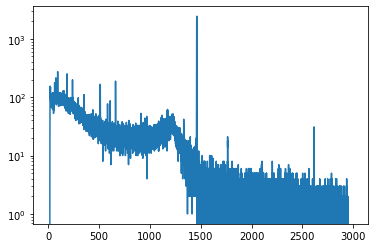

In [5]:
plt.plot(energies,counts)
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


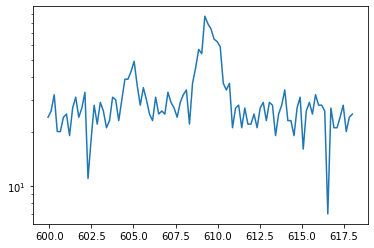

In [6]:
index0 = f_near(energies, source_energies[0])
plt.plot(energies[index0-50:index0+50], counts[index0-50:index0+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


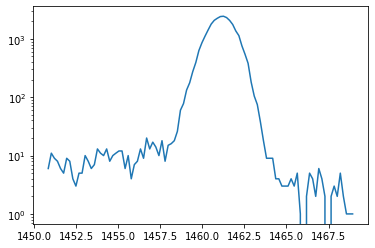

In [7]:
index1 = f_near(energies, source_energies[1])
plt.plot(energies[index1-50:index1+50], counts[index1-50:index1+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


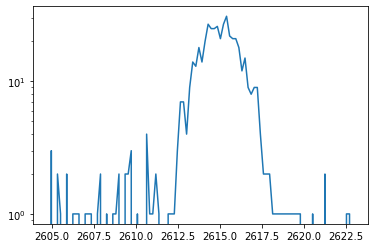

In [8]:
index2 = f_near(energies, source_energies[2])
plt.plot(energies[index2-50:index2+50], counts[index2-50:index2+50])
plt.yscale('log')

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  Depre

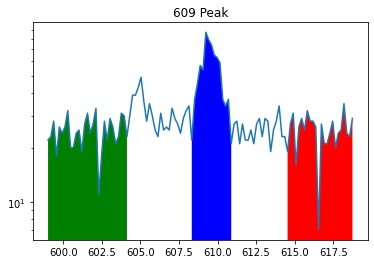

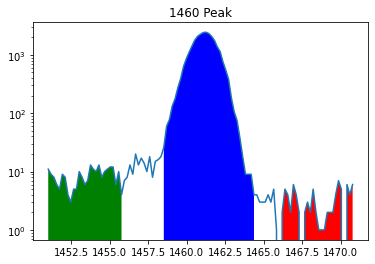

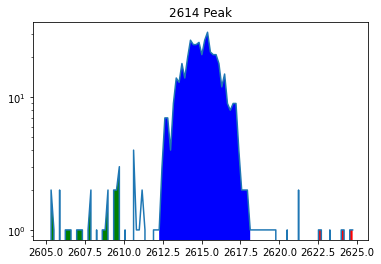

In [9]:
roi.set_sideband(609, 5, [[-2, -0.925], [-0.15, 0.45], [1.1, 2]])
roi.set_sideband(1460, 5, [[-2, -1], [-0.5, 0.725], [1, 2]])
roi.set_sideband(2614, 5, [[-2, -1], [-0.575, 0.675], [1, 2]])

plot_peak_region(roi, spec, source_energies, 609)
plot_peak_region(roi, spec, source_energies, 1460)
plot_peak_region(roi, spec, source_energies, 2614)